# Problem Statement

# A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month. Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


In [1]:
# Import necessary liabries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
data1 = pd.read_csv(r"C:\Users\yjjai\Downloads\Black_Friday-Project--1-\Black_Friday Project\blackFriday_test.csv")

In [4]:
data1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [5]:
data2 = pd.read_csv(r"C:\Users\yjjai\Downloads\Black_Friday-Project--1-\Black_Friday Project\blackFriday_train.csv")

In [6]:
data2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [7]:
data = pd.concat([data1,data2])

In [8]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368.0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371.0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137.0
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365.0


In [9]:
# lets check the shape of data
data.shape

(783667, 12)

So , here we have 783667 rows and 12 columns

# Data is Duplicated ?

In [10]:
data.duplicated().sum()

0

so, here we have 0 Duplicated Data

In [11]:
# lets check the type of dataset
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [12]:
# lets check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [13]:
# Check Null Values
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [14]:
# check categorical data 
for col in data:
    print(col , "\n" , data[col].unique() , "\n")

User_ID 
 [1000004 1000009 1000010 ... 1001656 1005796 1001189] 

Product_ID 
 ['P00128942' 'P00113442' 'P00288442' ... 'P00370293' 'P00371644'
 'P00370853'] 

Gender 
 ['M' 'F'] 

Age 
 ['46-50' '26-35' '36-45' '18-25' '51-55' '55+' '0-17'] 

Occupation 
 [ 7 17  1 15  3  0  8 16  4 12 13 18 11  9  2 20 14 10  6 19  5] 

City_Category 
 ['B' 'C' 'A'] 

Stay_In_Current_City_Years 
 ['2' '0' '4+' '1' '3'] 

Marital_Status 
 [1 0] 

Product_Category_1 
 [ 1  3  5  4  2 10 15 18  8 13  6 11 12  7 16 14 17  9 20 19] 

Product_Category_2 
 [11.  5. 14.  9.  3.  4. 13.  2. nan  8. 15. 17. 12. 16.  6. 10. 18.  7.] 

Product_Category_3 
 [nan 12. 15.  9. 16. 14.  4.  3.  5.  8. 17. 13. 11. 10.  6. 18.] 

Purchase 
 [   nan  8370. 15200. ...   135.   123.   613.] 



# check all  data values

In [15]:
for col in data:
    print(col , "\n" , data[col].value_counts() , "\n")

User_ID 
 1001680    1468
1004277    1384
1001941    1286
1001181    1230
1000889    1204
           ... 
1004527      13
1005117      13
1000572      13
1005804      13
1004991      13
Name: User_ID, Length: 5891, dtype: int64 

Product_ID 
 P00265242    2709
P00025442    2310
P00110742    2292
P00112142    2279
P00046742    2084
             ... 
P00092742       1
P00309842       1
P00204042       1
P00104342       1
P00224642       1
Name: Product_ID, Length: 3677, dtype: int64 

Gender 
 M    590031
F    193636
Name: Gender, dtype: int64 

Age 
 26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64 

Occupation 
 4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dt

# Missing Value Treatment

In [16]:
# remove vlaue like (4+) in  Stay_In_Current_City_Years
data['Stay_In_Current_City_Years'] =data.Stay_In_Current_City_Years.replace('4+', 4)
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(int)

# Fill Missing Values with mean median

In [17]:
data['Product_Category_2'].fillna(data['Product_Category_2'].median(), inplace = True)

In [18]:
data['Purchase'].fillna(data['Purchase'].mean(), inplace = True)

# Drop unwanted  features

In [19]:
data.drop('Product_Category_3', axis =1 , inplace=True)

In [20]:
data.drop('User_ID', axis = 1, inplace=True)

In [21]:
data.drop('Product_ID', axis= 1, inplace=True)

In [22]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,M,46-50,7,B,2,1,1,11.0,9263.968713
1,M,26-35,17,C,0,0,3,5.0,9263.968713
2,F,36-45,1,B,4,1,5,14.0,9263.968713
3,F,36-45,1,B,4,1,4,9.0,9263.968713
4,F,26-35,1,C,1,0,4,5.0,9263.968713


In [23]:
data.shape

(783667, 9)

In [24]:
# Statistical summary
data.describe()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
count,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000
mean,8.079300,1.858247,0.409777,5.366196,9.579427,9263.968713
std,6.522206,1.288790,0.491793,3.878160,4.233575,4208.342958
min,0.000000,0.000000,0.000000,1.000000,2.000000,12.000000
25%,2.000000,1.000000,0.000000,1.000000,8.000000,6996.000000
50%,7.000000,2.000000,0.000000,5.000000,9.000000,9263.968713
75%,14.000000,3.000000,1.000000,8.000000,14.000000,9927.000000
max,20.000000,4.000000,1.000000,20.000000,18.000000,23961.000000


# Exploratory Data Analysis: Univarient

In [25]:
catg_features=[col for col in data.columns if data[col].dtypes=='object']
cont_features=[col for col in data.columns if data[col].dtypes!='object']


print(f'Number of Categorical features: {len(catg_features)}')
print(f'Number of Continuous features: {len(cont_features)}')

Number of Categorical features: 3
Number of Continuous features: 6


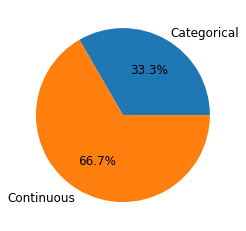

In [26]:
plt.pie([len(catg_features),len(cont_features)],labels=['Categorical','Continuous'],textprops={'fontsize':12},autopct='%1.1f%%')
plt.show()

# EXPLORATORY DATA ANALYSIS (EDA)

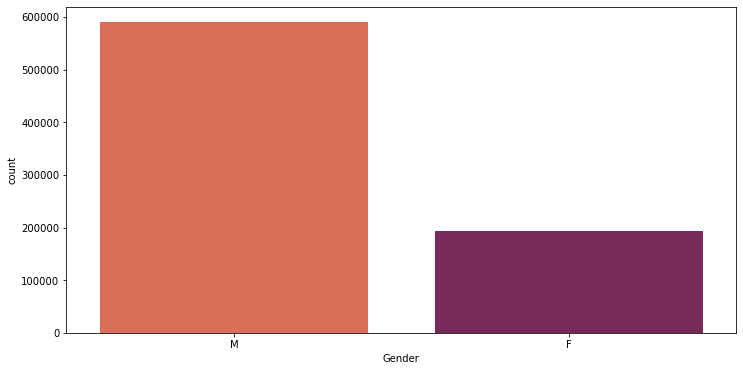

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='Gender',data=data, palette='rocket_r')
plt.show()

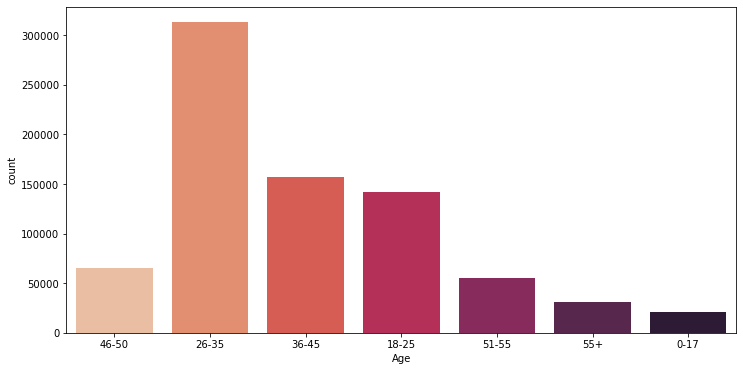

In [28]:
# AGE
plt.figure(figsize=(12,6))
sns.countplot(x='Age',data=data, palette='rocket_r')
plt.show()

In [29]:
# AGE
val=data.Age.value_counts().values
label = data.Age.value_counts().index

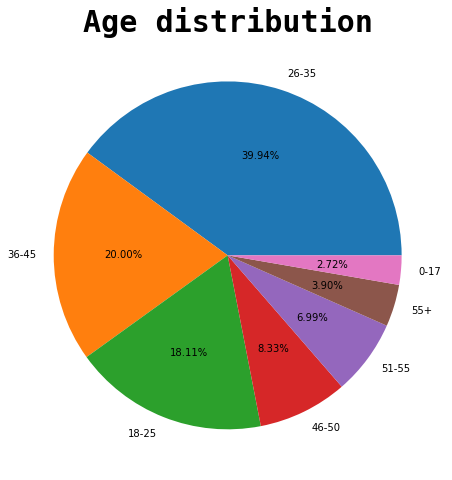

In [30]:
plt.figure(figsize=(10,8))
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.title('Age distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

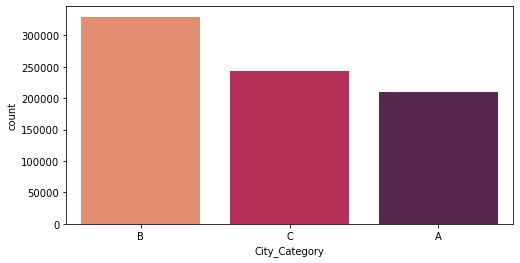

In [31]:
# City_Category
plt.figure(figsize=(8,4))
sns.countplot(x='City_Category',data=data, palette='rocket_r')
plt.show()

In [32]:
# City_Category
val=data.City_Category.value_counts().values
label = data.City_Category.value_counts().index

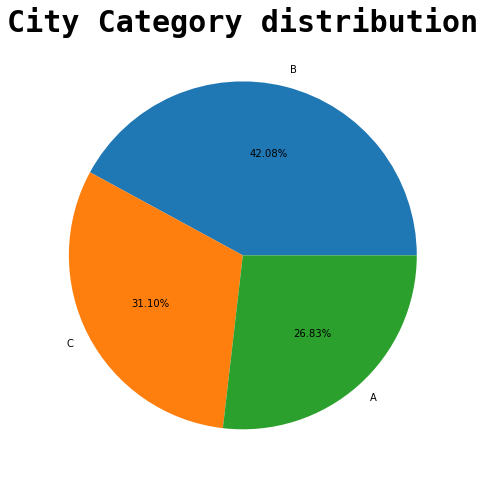

In [33]:
plt.figure(figsize=(10,8))
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.title('City Category distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

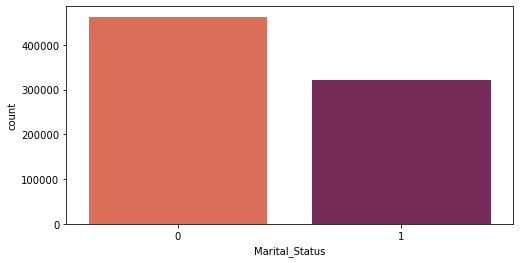

In [34]:
# Marital_Status
plt.figure(figsize=(8,4))
sns.countplot(x='Marital_Status',data=data, palette='rocket_r')
plt.show()

In [35]:
# Marital_Status
val=data.Marital_Status.value_counts().values
label = data.Marital_Status.value_counts().index

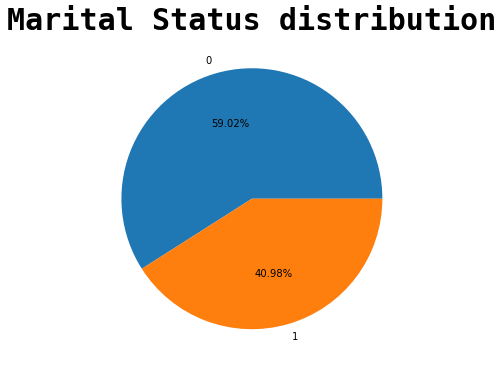

In [36]:
plt.figure(figsize=(9,6))
plt.pie(val[:10],labels=label[:10],autopct='%1.2f%%')
plt.title('Marital Status distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

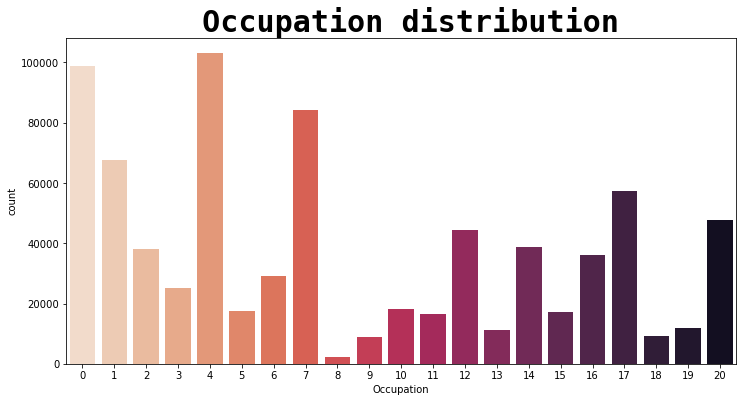

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='Occupation',data=data, palette='rocket_r')
plt.title(' Occupation distribution', fontdict = {'fontname' : 'Monospace', 'fontsize' : 30, 'fontweight' : 'bold'})
plt.show()

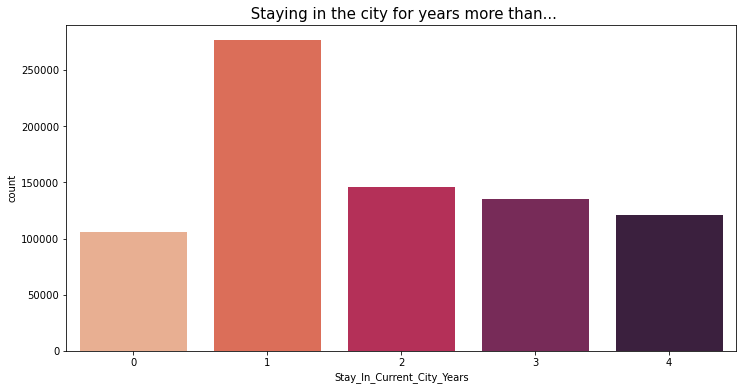

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='Stay_In_Current_City_Years',data=data, palette='rocket_r')
plt.title(' Staying in the city for years more than...',size=15)
plt.show()

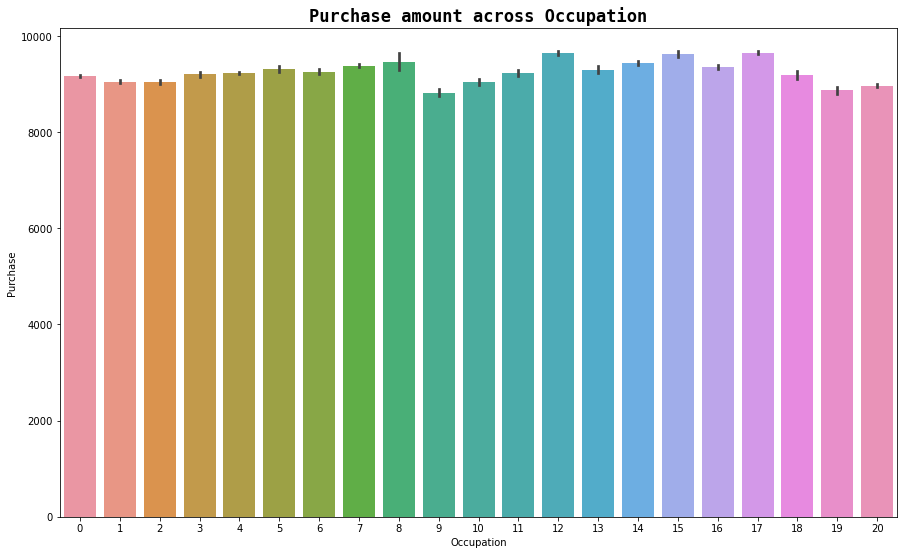

In [39]:
plt.figure(figsize=(15,9))
df_good = data.sort_values(by="Purchase",ascending=False)
sns.barplot(x="Occupation",y="Purchase",data=df_good,)
plt.title('Purchase amount across Occupation', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.show()

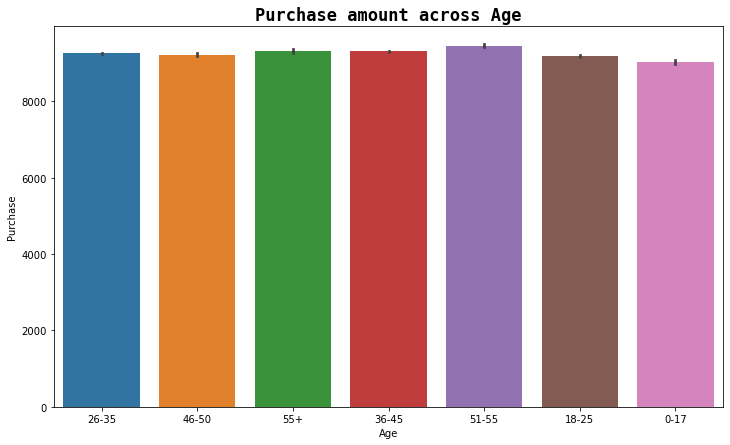

In [40]:
plt.figure(figsize=(12,7))
df_good = data.sort_values(by="Purchase",ascending=False)
sns.barplot(x="Age",y="Purchase",data=df_good)
plt.title('Purchase amount across Age', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.show()

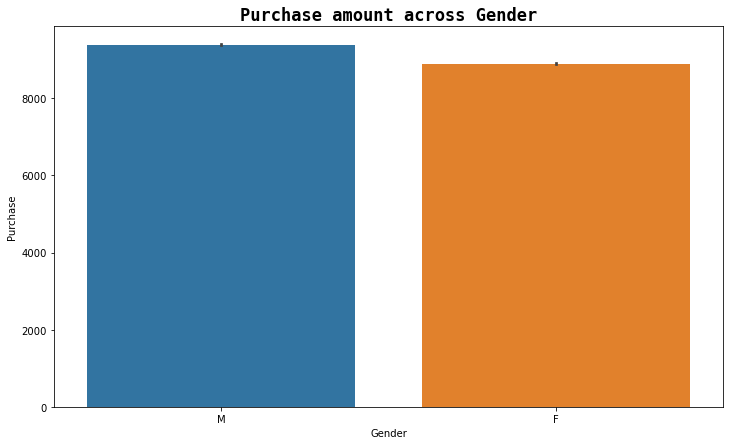

In [41]:
plt.figure(figsize=(12,7))
df_good = data.sort_values(by="Purchase",ascending=False)
sns.barplot(x="Gender",y="Purchase",data=df_good)
plt.title('Purchase amount across Gender', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.show()

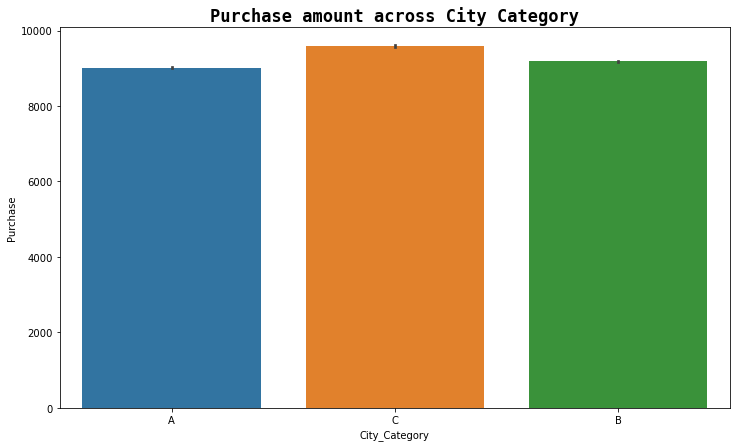

In [42]:
plt.figure(figsize=(12,7))
df_good = data.sort_values(by="Purchase",ascending=False)
sns.barplot(x="City_Category",y="Purchase",data=df_good)
plt.title('Purchase amount across City Category', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.show()

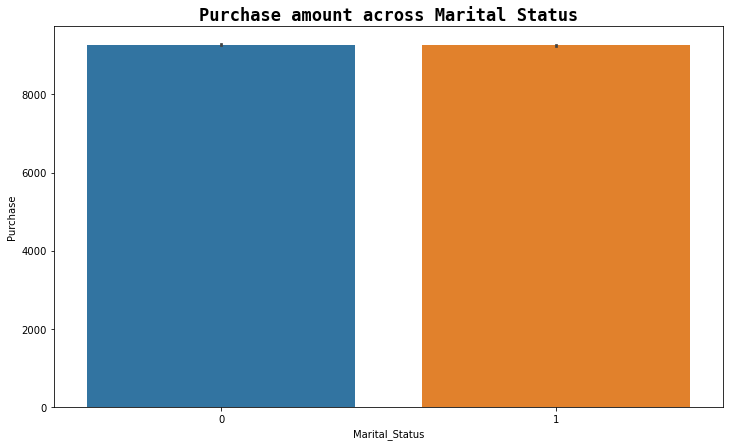

In [43]:
plt.figure(figsize=(12,7))
df_good = data.sort_values(by="Purchase",ascending=False)
sns.barplot(x="Marital_Status",y="Purchase",data=df_good)
plt.title('Purchase amount across Marital Status', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.show()

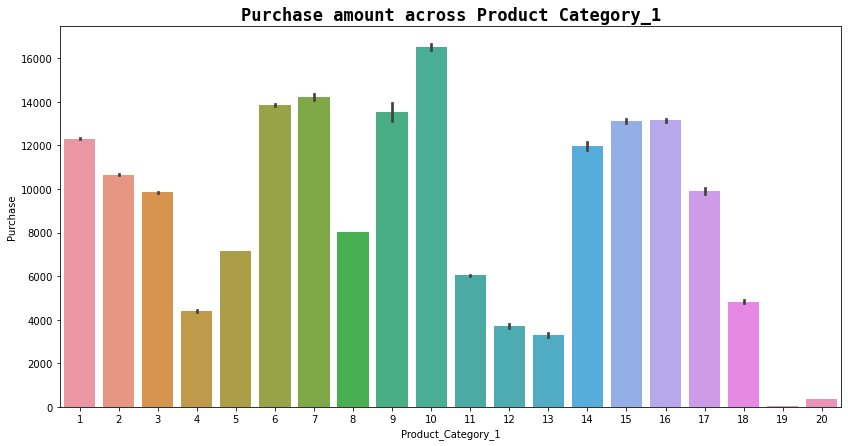

In [44]:
plt.figure(figsize=(14,7))
df_good = data.sort_values(by="Purchase",ascending=False)
sns.barplot(x="Product_Category_1",y="Purchase",data=df_good)
plt.title('Purchase amount across Product Category_1', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.show()

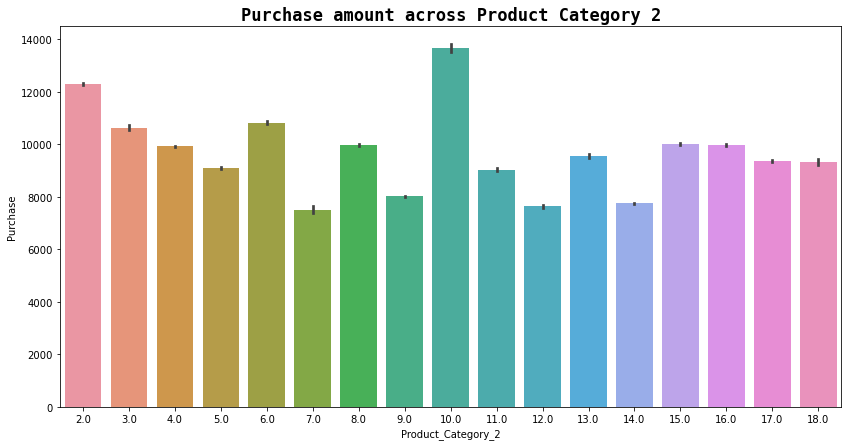

In [47]:
plt.figure(figsize=(14,7))
df_good = data.sort_values(by="Purchase",ascending=False)
sns.barplot(x="Product_Category_2",y="Purchase",data=df_good)
plt.title('Purchase amount across Product Category 2', fontdict = {'fontname' : 'Monospace', 'fontsize' : 17, 'fontweight' : 'bold'})
plt.show()

# After visualizing the data. I found Black Friday is the best online shopping day because Male and female both of use to shopping more.

# not to create machine learning models because Flip Robo Technologies says only findings and conclusions in detailed data analysis .